# Batch, Stochastic, and Mini-Batch Gradient Descent

This example shows the difference between Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent to train a linear regression model.

In [12]:
# make sure the required packages are installed
%pip install numpy pandas scikit-learn matplotlib seaborn --quiet

# import the required modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from time import time

import utils

random_state = 42

Note: you may need to restart the kernel to use updated packages.


## Data preparation

We use the Statistics Online Computational Resource (SOCR) dataset for human heights (inches) and weight (pounds). We load the dataset scale the X values.

In [13]:
(X_train, y_train), (X_test, y_test) = utils.load_dataset_from_csv('data/height_weight.csv',
                      ['Height'], 'Weight', 0.2, random_state=random_state)
# Scale X_train and X_test using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Plotting model results

The following function is used to show the X and y observations together with a plot (line) showing the linear regression model predictions.

In [14]:
def plot_model_results(model: SGDRegressor, X: pd.DataFrame, y: pd.Series, x_label: str, y_label_str,
                       title: str) -> None:
    """
    Plot the model results
    :param model: a linear regression model
    :param X: input data (independent variables or features)
    :param y: output data (dependent variable)
    :param x_label: label for the input data
    :param y_label_str: label for the output data
    :param title: title of the plot
    """
    plt.scatter(X, y, color='blue', marker='o', alpha=0.5)
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label_str)
    plt.show()

## Compare the three gradient descent methods

The following code trains a linear regression model using Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent. The models are evaluated, its training time is measured and the results are visualized.

Batch GD MSE: 104.3800. Executed in 0.0000 seconds.


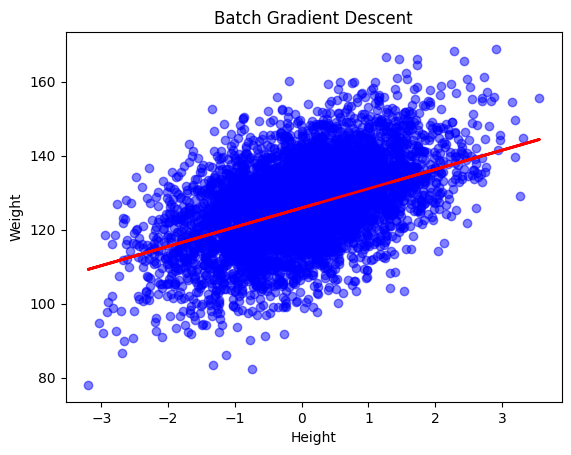

SGD MSE: 103.4674. Executed in 9.0468 seconds.


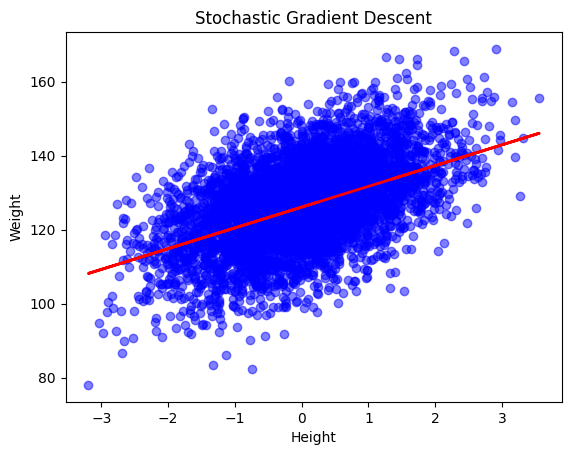

Mini-Batch MSE: 103.1134. Executed in 0.3316 seconds.


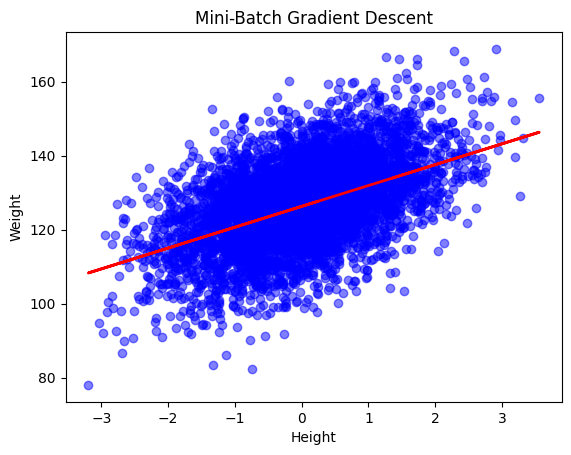

In [15]:
n_epochs = 1
learning_rate = 0.01
mini_batch_size = 32

# Batch Gradient Descent
before = time()
# tol=None means that the algorithm will run for n_epochs iterations
# learning_rate='constant' means that the learning is not adapted at each iteration
# penalty=None means that there is no regularization
bgd_model = SGDRegressor(max_iter=n_epochs, tol=None, learning_rate='constant', eta0=learning_rate, penalty=None,
                         random_state=random_state)
bgd_model.fit(X_train, y_train)
print(f'Batch GD MSE: {mean_squared_error(y_test, bgd_model.predict(X_test)):.4f}.', end=' ')
print(f'Executed in {time() - before:.4f} seconds.')
plot_model_results(bgd_model, X_test, y_test, 'Height', 'Weight', 'Batch Gradient Descent')

# Stochastic Gradient Descent
before = time()
sgd_model = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate, penalty=None,
                         random_state=random_state)
for _ in range(n_epochs):  # Manually perform n_epochs epochs
    for i in range(len(y_train)):
        sgd_model.partial_fit(X_train[i:i + 1], y_train[i:i + 1])
print(f'SGD MSE: {mean_squared_error(y_test, sgd_model.predict(X_test)):.4f}.', end=' ')
print(f'Executed in {time() - before:.4f} seconds.')
plot_model_results(sgd_model, X_test, y_test, 'Height', 'Weight', 'Stochastic Gradient Descent')

# Mini-Batch Gradient Descent
before = time()
mbgd_model = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate, penalty=None,
                          random_state=random_state)
for _ in range(n_epochs):  # Manually perform n_epochs epochs
    for i in range(0, len(y_train), mini_batch_size):
        mbgd_model.partial_fit(X_train[i:i + mini_batch_size], y_train[i:i + mini_batch_size])
print(f'Mini-Batch MSE: {mean_squared_error(y_test, mbgd_model.predict(X_test)):.4f}.', end=' ')
print(f'Executed in {time() - before:.4f} seconds.')
plot_model_results(mbgd_model, X_test, y_test, 'Height', 'Weight', 'Mini-Batch Gradient Descent')

## ✨ Questions ✨

1. What is the model that takes longer to train one epoch? Why? 
2. What is the model that trains faster for one epoch? Why?
3. What is the model with the worst performance when running one single epoch? Why?
4. What do you think it would be the model with the worst performance when running many epochs? Why?
5. What is the model that requires more memory to train? Why?
6. What is the model that requires less memory to train? Why?
7. What is the model with the best performance relative to the memory and time spent? Why?

### Answers 

*Write your answers here.*

1. SGD takes longer to train one epoch. This is because it updates the parameters for each sample.
2. Batch GD. This is because it uses all the training data to update the parameters (only once per epoch).
3. BGD because it updates the parameters only once.
4. SGD because it updates the parameters for each sample, which introduces noise in the updates.
5. Batch Gradient Descent. This is because it uses all the training data to update the parameters at each iteration.
6. SGD because it uses only one sample to update the parameters at each iteration.
7. Mini-Batch GD because it uses a batch of samples to update the parameters at each iteration, which reduces the noise in the updates and speeds up the training process.